# COGS 118A Group 035 Wi23 - Logistic Regression with sk-learn
### Group Memebers:
<ul >
  <li style="padding-left: 20px;"> Jamie Wei (A15921963) </li>
  <li style="padding-left: 20px;"> Nicole Rangan (A15011222) </li>
  <li style="padding-left: 20px;"> Sarita Raghunath (A16425750) </li>
  <li style="padding-left: 20px;"> Zehong Li (A15852954) </li>
</ul>

In [9]:
#necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV , train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_recall_curve

In [10]:
#assert library import
assert np
assert pd
assert plt
assert sns
assert LogisticRegression
assert GridSearchCV
assert train_test_split
assert confusion_matrix
assert accuracy_score
assert classification_report
assert ConfusionMatrixDisplay
assert roc_curve
assert auc
assert RocCurveDisplay
assert PrecisionRecallDisplay
assert LabelEncoder

In [11]:
# read csv
df = pd.read_csv('cleaned_data_final.csv')

# turn labels to 0 and 1s
df['radiant_win'] = df['radiant_win'].replace({True: 1, False: 0})

# a peek at our dataset
df

,match_id,radiant_win,duration,avg_mmr,team1_hero1,team1_hero2,team1_hero3,team1_hero4,team1_hero5,team1_hero6,...,team2_hero119,team2_hero120,team2_hero121,team2_hero123,team2_hero126,team2_hero128,team2_hero129,team2_hero135,team2_hero136,team2_hero137
0,7045889918,0,2199,2607.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7045889915,1,2301,2931.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7045889913,1,2093,1942.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7045889912,0,2856,4332.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,7045889911,0,3539,3942.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91583,6744845900,0,3297,2763.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91584,6744846112,1,1915,2882.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91585,6744847011,0,2101,2159.0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
91586,6744847112,1,2494,2107.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 4:], df[['radiant_win']], test_size=0.2, random_state=42)

In [34]:
# Define hyperparameter tuning dictionary
params = [
    {
        'solver': ['lbfgs', 'sag', 'newton-cg'],
        'penalty': ['none', 'l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100]
    },
    {
        'solver': ['liblinear'],
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100]
    },
    {
        'solver': ['saga'],
        'penalty': ['none', 'l1', 'l2', 'elasticnet'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'l1_ratio': [0.25, 0.5, 0.75]
    }
]

In [35]:
# Create logistic regression model
# update from Nicole's work: added random_state such that it is reproducible
model = LogisticRegression(random_state = 42)

# Perform random search for hyperparameters
search = GridSearchCV (model, param_grid=params, cv=3, n_jobs=-1, verbose = 3)
search_result = search.fit(X_train, y_train.values.ravel())

Fitting 3 folds for each of 120 candidates, totalling 360 fits


In [36]:
# Get best hyperparameters from search
best_params = search_result.best_params_
print(best_params)

{'C': 10, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}


In [38]:
# Train logistic regression model with best hyperparameters
model = LogisticRegression(**best_params, verbose = 3)
history = model.fit(X_train, y_train.values.ravel())


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 65 epochs took 18 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.1s finished


In [39]:
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold

# get prediction
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
test_accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, model.predict(X_train))

# Train and test model with K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
train_acc = []
test_acc = []
for train_index, test_index in kf.split(X_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    model.fit(X_train_fold, y_train_fold.values.ravel())
    train_acc.append(accuracy_score(y_train_fold, model.predict(X_train_fold)))
    test_acc.append(accuracy_score(y_test_fold, model.predict(X_test_fold)))



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 68 epochs took 14 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 56 epochs took 11 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 89 epochs took 20 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 21 seconds


C:\Users\Dominic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 66 epochs took 14 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.8s finished


In [40]:
# define a show metric function
def show_metrics(y_tr, y_te, yhat_tr, yhat_te, named):
    # accuracy scores for training and test sets
    acc_train = accuracy_score(y_tr, yhat_tr)
    acc_test = accuracy_score(y_te, yhat_te)

    print(f'training set accuracy (n={y_tr.shape[0]}): {acc_train:4.3f}')
    print(f'test set accuracy (n={y_te.shape[0]}): {acc_test:4.3f}')
    print()
    print('classificiation report on test set performance')
    print(classification_report(y_te, yhat_te, digits = 5))
    print()

    with sns.axes_style('white'):
        # confusion matrix
        ConfusionMatrixDisplay.from_predictions(y_te, yhat_te)
        plt.show()
        
        # roc-auc
        fpr, tpr, thresholds = roc_curve(y_te, yhat_te) 
        roc_auc = auc(fpr, tpr)
        roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name=named)
        roc_display.plot()
        plt.title('ROC Curve')
        plt.show()
        
        # precision-recall auc
        precision, recall, thresholds = precision_recall_curve(y_te, yhat_te)
        pr_auc = auc(recall, precision)
        pr_display = PrecisionRecallDisplay(precision=precision, recall=recall,
                                             average_precision=pr_auc,
                                             estimator_name=named)
        pr_display.plot()
        plt.title('Precision-Recall Curve')
        plt.show()
        
        # balanced accuracy
        tn, fp, fn, tp = confusion_matrix(y_te, yhat_te).ravel()
        balanced_accuracy = (tp/(tp+fn) + tn/(tn+fp))/2
        print(f'Balanced accuracy: {balanced_accuracy:.3f}')
        
        # specificity and negative predictive value
        specificity = tn / (tn + fp)
        npv = tn / (tn + fn)
        print(f'Specificity: {specificity:.3f}')
        print(f'Negative predictive value: {npv:.3f}')
        
        # false positive and false negative rates
        fpr = fp / (fp + tn)
        fnr = fn / (fn + tp)
        print(f'False positive rate: {fpr:.3f}')
        print(f'False negative rate: {fnr:.3f}')


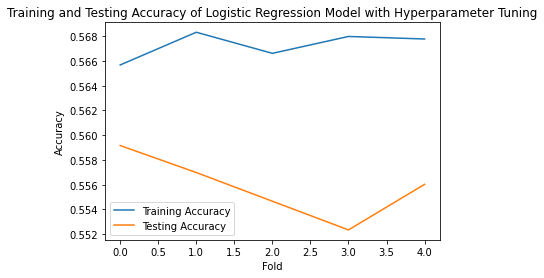

Training accuracy: 0.5664391974887403
Testing accuracy: 0.5550278414674091


In [41]:
# Plot the training and testing accuracy history
plt.plot(train_acc, label='Training Accuracy')
plt.plot(test_acc, label='Testing Accuracy')
plt.title('Training and Testing Accuracy of Logistic Regression Model with Hyperparameter Tuning')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

training set accuracy (n=73270): 0.565
test set accuracy (n=18318): 0.550

classificiation report on test set performance
              precision    recall  f1-score   support

           0    0.54464   0.55473   0.54964      9062
           1    0.55601   0.54592   0.55092      9256

    accuracy                        0.55028     18318
   macro avg    0.55032   0.55033   0.55028     18318
weighted avg    0.55038   0.55028   0.55028     18318




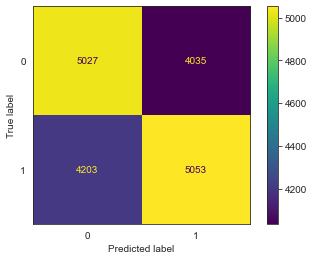

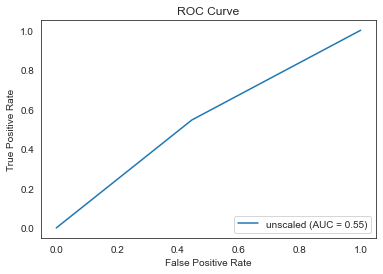

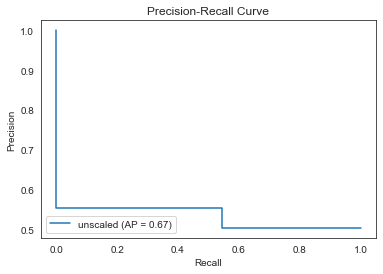

Balanced accuracy: 0.550
Specificity: 0.555
Negative predictive value: 0.545
False positive rate: 0.445
False negative rate: 0.454


In [42]:
# get both predicted train and test labels
yhat_te_prob = model.predict(X_test)
yhat_te = (yhat_te_prob > 0.5).astype(int)
yhat_te

yhat_tr_prob = model.predict(X_train)
yhat_tr = (yhat_tr_prob > 0.5).astype(int)
yhat_tr

#show our metrics
show_metrics(y_train, y_test, yhat_tr, yhat_te, 'unscaled')